# Intro

### **Imports + Data Preparation**

In [23]:
# Packages
import numpy as np
import pandas as pd
# Pandas' options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
# Import Data
team_attr = pd.read_csv('/Users/enricocattaneo/Desktop/MODEL PERFORMANCES/almost_finaldata.csv').set_index('id')
# Correct some Errors
team_attr.loc[team_attr['attendance'] < 0, 'attendance'] = 0 
team_attr.loc[team_attr['temp'] < -10, 'temp'] = -7
team_attr.loc[team_attr['temp'] > 40, 'temp'] = 36
# Create New Features
team_attr['attendance/capacity'] = team_attr['attendance'] / team_attr['venue_capacity']
team_attr.loc[team_attr['attendance/capacity'] > 1.2, 'attendance/capacity'] = team_attr['attendance/capacity'].quantile(0.99)
# Keep only Relevant Features
team_attr = team_attr[['isrival_home','isrival_away','home_founded_cat','away_founded_cat','attendance','venue_capacity','attendance/capacity','venue_grass_surface','temp','precip','cloudcover','humidity','pressure','winddir','windgust','windspeed','night_game','travel_distance','colors_home_color','colors_away_color','result', 'round_start']]
team_attr.tail()

,isrival_home,isrival_away,home_founded_cat,away_founded_cat,attendance,venue_capacity,attendance/capacity,venue_grass_surface,temp,precip,cloudcover,humidity,pressure,winddir,windgust,windspeed,night_game,travel_distance,colors_home_color,colors_away_color,result,round_start
id,,,,,,,,,,,,,,,,,,,,,,
18220177,0,0,7,9,6839,21584,0.316855,1,1.8,0.0,0.0,69.32,1014.6,37.0,1.8,0.5,0,134,#339063,#F0F0F0,1,2022-04-09
18220178,0,0,9,9,6202,27994,0.221547,1,14.6,0.0,15.3,28.25,1017.0,106.0,2.8,0.6,1,125,#5B000F,#F0F0F0,0,2022-04-09
18220179,0,0,9,10,4888,10500,0.465524,1,13.8,0.0,0.1,65.90,1018.4,205.0,30.8,15.0,0,98,#0A0A0A,#00C1BA,2,2022-04-09
18220185,0,0,9,10,51362,80018,0.641881,1,21.1,0.0,0.0,30.21,1017.9,97.0,13.0,6.5,1,119,#C40010,#CCCCCC,1,2022-04-15
18220188,0,0,9,9,5414,10336,0.523800,0,21.1,0.0,0.0,45.08,1023.0,156.0,3.2,0.1,0,162,#F0F0F0,#002B87,2,2022-04-15


In [33]:
# Convert colors values
conv_colors = {'#F0F0F0':'W','#C40010':'RE','#0A0A0A':'BL','#FFDF1B':'YE','#002B87':'NA','#0046A8':'BL','#FBED32':'YE','#262626':'GY','#022857':'NA','#940014':'MA','#2B72DE':'AQ','#00C1BA':'AQ','#D6003D':'RE','#79ADE2':'AQ','#832034':'MA','#339063':'GRN','#CCCCCC':'GY','#C0D6FE':'AQ','#B0E8E6':'AQ','#679FEA':'AQ','#0C183A':'NA','#F4F48A':'YE','#FDBD0F':'OR','#0060BF':'BL','#025C17':'GRN','#EA9C08':'OR','#3B1E4F':'PU','#F61917':'RE','#007848':'GRN','#FC7E00':'OR','#7C45CA':'PU','#E996BC':'FU','#FCC24F':'YE','#4BD43B':'GRN','#A7D6F5':'AQ','#E03A3E':'RE','#B9D9EC':'AQ','#2291FF':'AQ','#482F8A':'PU','#1544B8':'BL','#235234':'GRN','#1E48C0':'BL','#666666':'GY','#ABD422':'GRN','#BFFFBF':'GRN','#D50619':'RE','#F18A01':'OR','#2F97DA':'AQ','#EB172B':'RE','#E11B22':'RE','#202A44':'NA','#EEC0C8':'FU','#5B000F':'MA','#004F9F':'BL','#D71920':'RE','#D94B14':'OR','#D82520':'RE','#881319':'MA','#AAAAAA':'GY','#8EBADB':'AQ','#999900':'GRN','#D61414':'RE','#316F37':'GRN','#00AA64':'GRN','#0C7662':'GRN','#888888':'GY','#34165F':'PU','#2F6452':'GRN','#111111':'BL','#AA5B9C':'FU','#E41B1B':'RE','#D446BA':'FU','#013D38':'GRN','#283964':'BL','#171C28':'BL','#FDE713':'YE','#CE0000':'RE','#451021':'MA','#1F162B':'BL','#04614A':'GRN','#5F002B':'MA', '#800000':'MA'}
team_attr['colors_home_color'].replace(conv_colors, inplace=True)
team_attr['colors_away_color'].replace(conv_colors, inplace=True)

In [41]:
team_attr = team_attr.loc[team_attr['round_start'] < '2020-02-21']

In [36]:
num_attr = ['attendance','venue_capacity','attendance/capacity','temp','precip','cloudcover','humidity','pressure','winddir','windgust','windspeed','travel_distance']
cat_attr = ['colors_home_color','colors_away_color']
# ['isrival_home','isrival_away','home_founded_cat','away_founded_cat','venue_grass_surface','night_game'] are categorical variables and already with correct encodings

### **Informations**

In [43]:
round(team_attr.describe(), 2)

,isrival_home,isrival_away,home_founded_cat,away_founded_cat,attendance,venue_capacity,attendance/capacity,venue_grass_surface,temp,precip,cloudcover,humidity,pressure,winddir,windgust,windspeed,night_game,travel_distance,result
count,6663.00,6663.00,6663.00,6663.00,6663.00,6663.00,6663.00,6663.00,6663.00,6663.00,6663.00,6663.00,6663.00,6663.00,6663.00,6663.00,6663.00,6663.00,6663.00
mean,0.02,0.02,8.26,8.26,30462.49,39437.31,0.77,1.00,13.17,0.21,34.60,69.25,1015.83,190.40,18.76,9.93,0.47,382.32,1.05
std,0.15,0.15,2.07,2.07,18004.47,20368.34,0.21,0.05,7.05,4.90,29.52,18.54,7.85,101.54,14.43,9.05,0.50,317.40,0.73
min,0.00,0.00,0.00,0.00,0.00,1565.00,0.00,0.00,-7.00,0.00,0.00,1.08,973.70,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,7.00,7.00,16409.00,23500.00,0.62,1.00,8.00,0.00,8.80,56.80,1012.40,106.00,8.20,3.60,0.00,188.00,1.00
50%,0.00,0.00,9.00,9.00,25214.00,34000.00,0.81,1.00,12.60,0.00,28.70,72.04,1016.20,201.00,15.80,7.90,0.00,319.00,1.00
75%,0.00,0.00,9.00,9.00,41415.50,54000.00,0.96,1.00,17.90,0.00,52.80,83.88,1020.10,271.00,25.50,13.90,1.00,496.00,2.00
max,1.00,1.00,12.00,12.00,98485.00,98787.00,1.20,1.00,36.30,228.60,100.00,100.00,1046.60,360.00,106.00,129.10,1.00,2907.00,2.00


In [44]:
team_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6663 entries, 2188 to 11937684
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isrival_home         6663 non-null   int64  
 1   isrival_away         6663 non-null   int64  
 2   home_founded_cat     6663 non-null   int64  
 3   away_founded_cat     6663 non-null   int64  
 4   attendance           6663 non-null   int64  
 5   venue_capacity       6663 non-null   int64  
 6   attendance/capacity  6663 non-null   float64
 7   venue_grass_surface  6663 non-null   int64  
 8   temp                 6663 non-null   float64
 9   precip               6663 non-null   float64
 10  cloudcover           6663 non-null   float64
 11  humidity             6663 non-null   float64
 12  pressure             6663 non-null   float64
 13  winddir              6663 non-null   float64
 14  windgust             6663 non-null   float64
 15  windspeed            6663 non-n

### **Visualizations**

In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

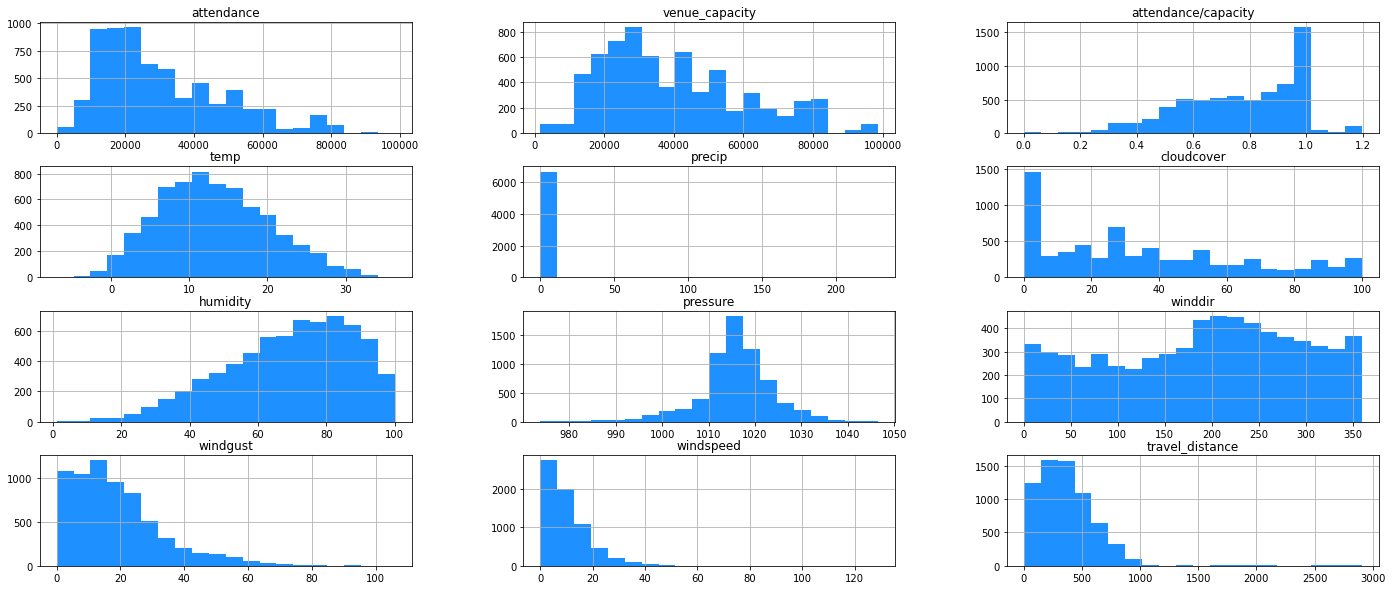

In [46]:
%matplotlib inline
team_attr[num_attr].hist(bins=20, figsize=(24,10), color = 'dodgerblue')
plt.show()

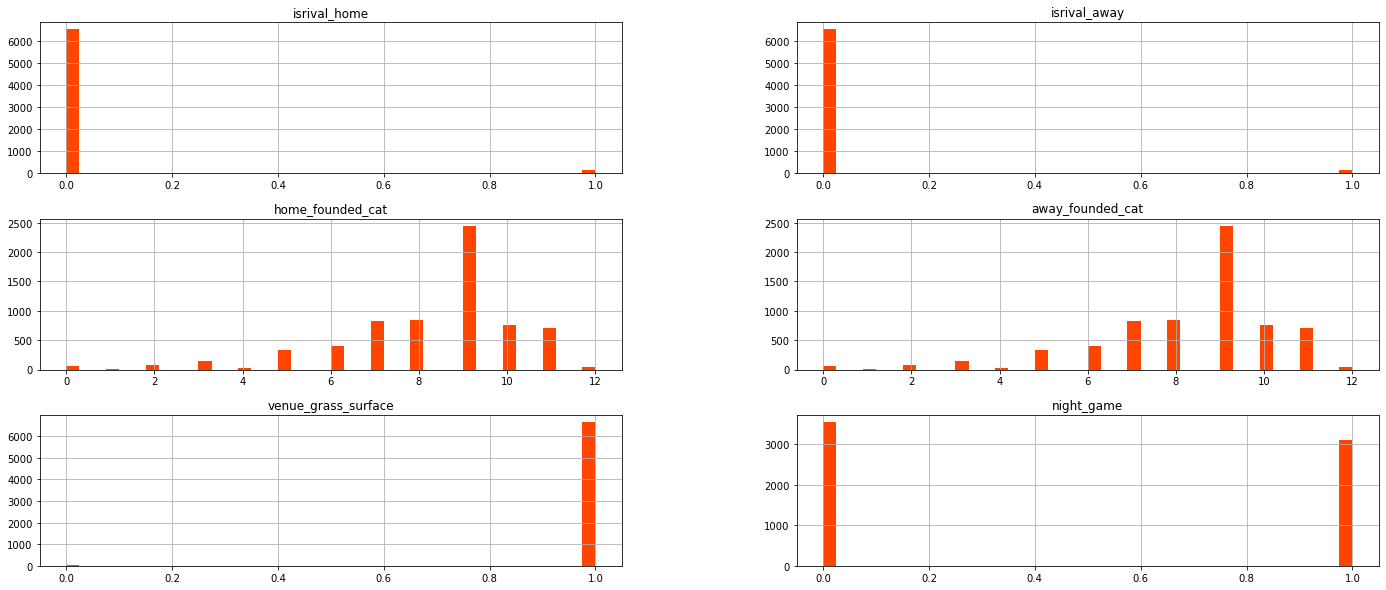

In [47]:
team_attr[['isrival_home','isrival_away','home_founded_cat','away_founded_cat','venue_grass_surface','night_game']].hist(bins=40, figsize=(24,10), color='orangered')
plt.show()

In [48]:
num_for_plot = [['attendance','venue_capacity','attendance/capacity'],['temp','precip','cloudcover'],['humidity','pressure','winddir'],['windgust','windspeed','travel_distance']]
# Create subplots grid
fig = make_subplots(rows=4, cols=3)
# Add traces and update y-axes title
for ind, i in enumerate(num_for_plot):
    fig.add_trace(go.Box(x = team_attr['result'], y = team_attr[i[0]], name = i[0]), row = ind + 1, col = 1)
    fig.add_trace(go.Box(x = team_attr['result'], y = team_attr[i[1]], name = i[1]), row = ind + 1, col = 2)
    fig.add_trace(go.Box(x = team_attr['result'], y = team_attr[i[2]], name = i[2]), row = ind + 1, col = 3)
fig.show()      

# **Different Encodings Models**

### **Preparation**

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [52]:
n_neighbors = list(range(1, 100, 3))
estimators_and_par = {
    'LOGISTIC REGRESSION': [LogisticRegression(), {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'C':[0.001, 0.01, 0.1, 1, 5, 10, 15, 100], 'multi_class':['multinomial'], 'max_iter':[3500]}],
    'KNN': [KNeighborsClassifier(), {'n_neighbors':n_neighbors}],
    'DECISION TREE': [DecisionTreeClassifier(), {'criterion': ['gini', 'entropy'], 'max_depth': list(range(1,12)), 'random_state':[14]}],
    'RANDOM FORESTS': [RandomForestClassifier(), {'bootstrap': [True], 'max_depth': [5, 10, 20], 'min_samples_leaf': [4, 6, 10], 'min_samples_split': [7,10,15], 'n_estimators': [100, 500, 750], 'random_state':[14]}],
    'ADABOOST': [AdaBoostClassifier(), {'n_estimators':[10, 100, 250, 500, 1000, 2000],'learning_rate':[0.001,0.01, 0.1]}],
    'NAIVE BAYES': [GaussianNB(), {'var_smoothing': np.logspace(0,-9, num=100)}]
}

In [12]:
def grinding(estimator, grid_parameters):
    global X_tr, y_train, X_te, y_test
    gs = GridSearchCV(estimator=estimator, param_grid=grid_parameters, cv=4, scoring='accuracy', refit=True, n_jobs=-1)
    gs.fit(X_tr,y_train)
    print('Best Train Accuracy: ', gs.best_score_)
    print('Best Model: ', gs.best_estimator_)
    # Make y_pred from the best model
    model_BEST = gs.best_estimator_
    model_BEST.fit(X_tr, y_train)
    y_pred =model_BEST.predict(X_te)
    # Model's Accuracy 
    print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred))
    # Plot the Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    fig = plt.subplots(figsize=(18, 7))
    plot = sns.heatmap(cm, annot=True, fmt='g',cmap='plasma', linewidth=1)  
    plot.set_xlabel('Predicted labels')
    plot.set_ylabel('True labels')
    plot.set_title('Confusion Matrix: ')
    plot.xaxis.set_ticklabels(['Draw', 'Home', 'Away'])
    plot.yaxis.set_ticklabels(['Draw', 'Home', 'Away'])
    plt.show()

### **Model 1**

################ LOGISTIC REGRESSION ################


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Train Accuracy:  0.4669800614568056
Best Model:  LogisticRegression(C=0.01, max_iter=3500, multi_class='multinomial',
                   solver='newton-cg')
Test Accuracy:  0.47861965491372843


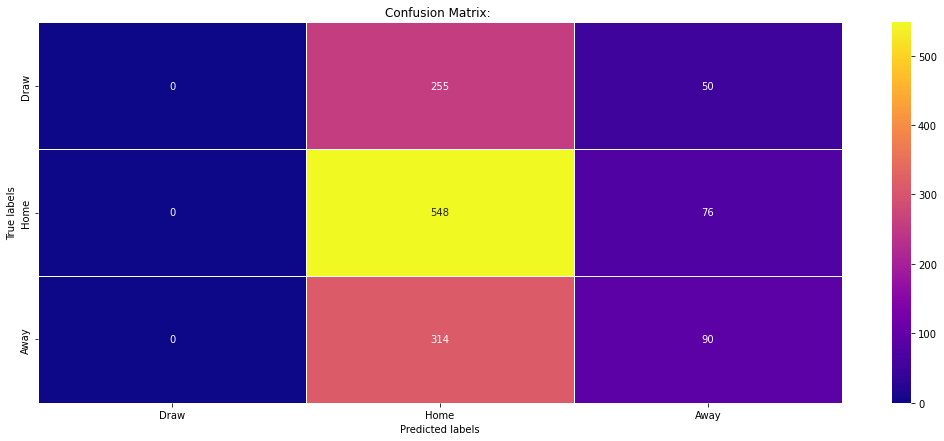

################ KNN ################
Best Train Accuracy:  0.46172635501217646
Best Model:  KNeighborsClassifier(n_neighbors=97)
Test Accuracy:  0.4763690922730683


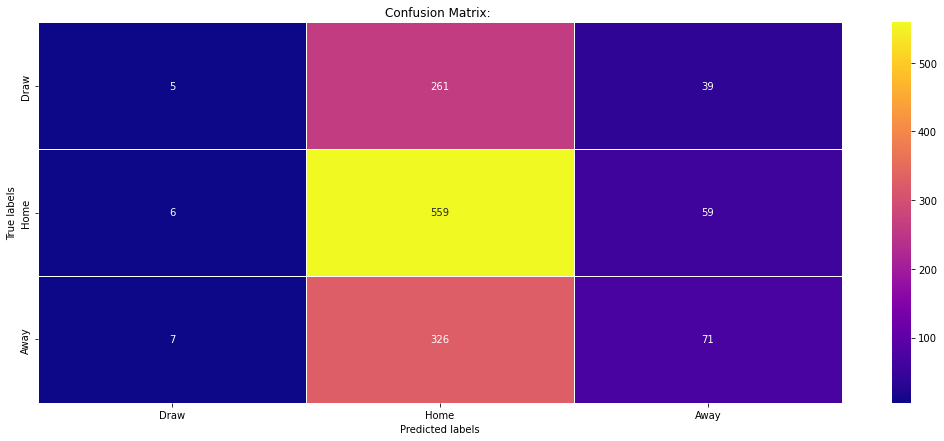

################ DECISION TREE ################
Best Train Accuracy:  0.46810492037423773
Best Model:  DecisionTreeClassifier(max_depth=2, random_state=14)
Test Accuracy:  0.4838709677419355


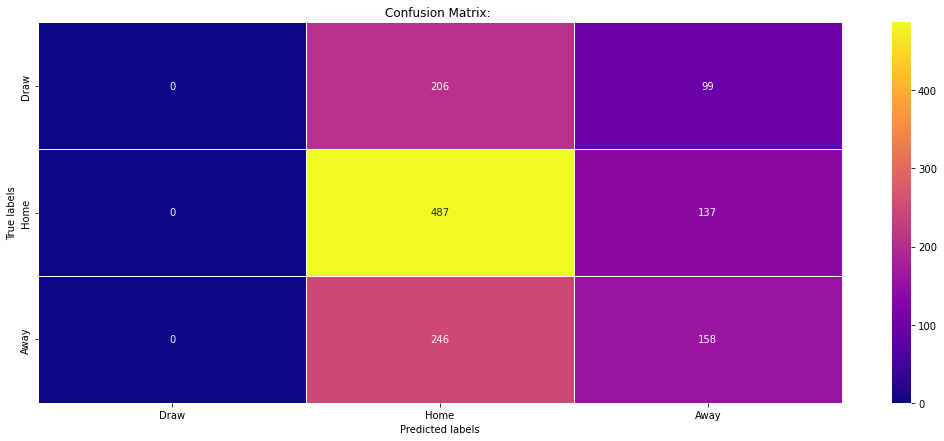

################ RANDOM FORESTS ################
Best Train Accuracy:  0.481051569198606
Best Model:  RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=500, random_state=14)
Test Accuracy:  0.4891222805701425


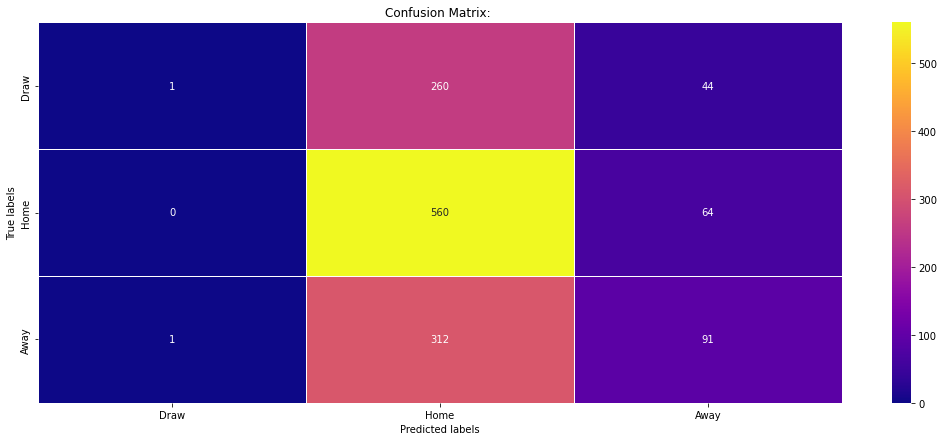

################ ADABOOST ################
Best Train Accuracy:  0.46979185674797075
Best Model:  AdaBoostClassifier(learning_rate=0.1, n_estimators=250)
Test Accuracy:  0.48237059264816207


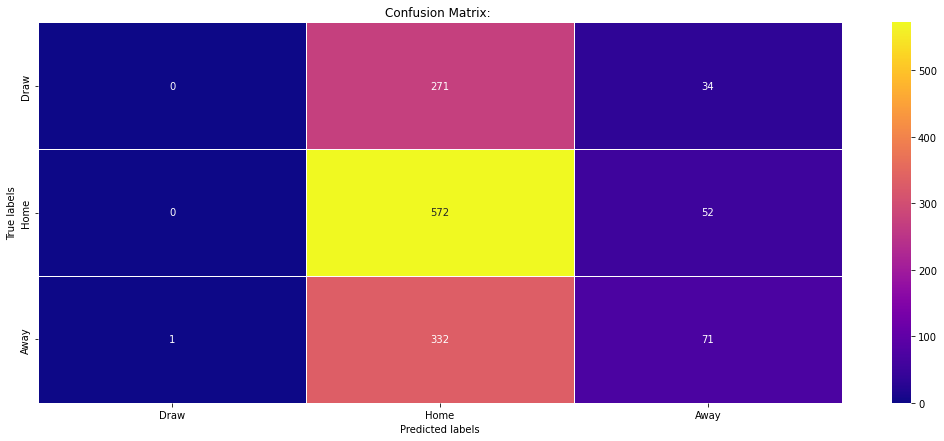

################ NAIVE BAYES ################
Best Train Accuracy:  0.4579742908700148
Best Model:  GaussianNB(var_smoothing=1.0)
Test Accuracy:  0.4628657164291073


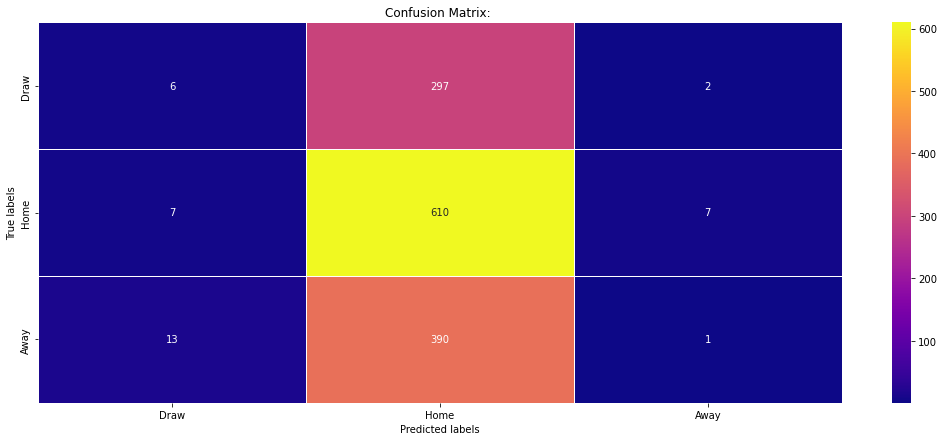

In [53]:
# Slit train and test sets
X = team_attr.loc[:, :'colors_away_color']
y = team_attr['result'] # try also with no-goal
X_train, X_test, y_train, y_test,= train_test_split(X, y, test_size=0.2, random_state=14)
# Preparing for Transformation
num_attrs = list(num_attr)
cat_attrs = list(cat_attr)
# Categorical and scaling transformation Pipeline
full_pipeline = ColumnTransformer([('num', StandardScaler(), num_attrs),('hot_attr', OneHotEncoder(), cat_attrs)])
X_tr = full_pipeline.fit_transform(X_train)
X_te = full_pipeline.fit_transform(X_test)


for key, value in estimators_and_par.items():
    print('################', key, '################')
    grinding(estimator=value[0], grid_parameters=value[1])

### **Model 2**

################ LOGISTIC REGRESSION ################
Best Train Accuracy:  0.4726090024758442
Best Model:  LogisticRegression(C=1, max_iter=3500, multi_class='multinomial')
Test Accuracy:  0.48237059264816207


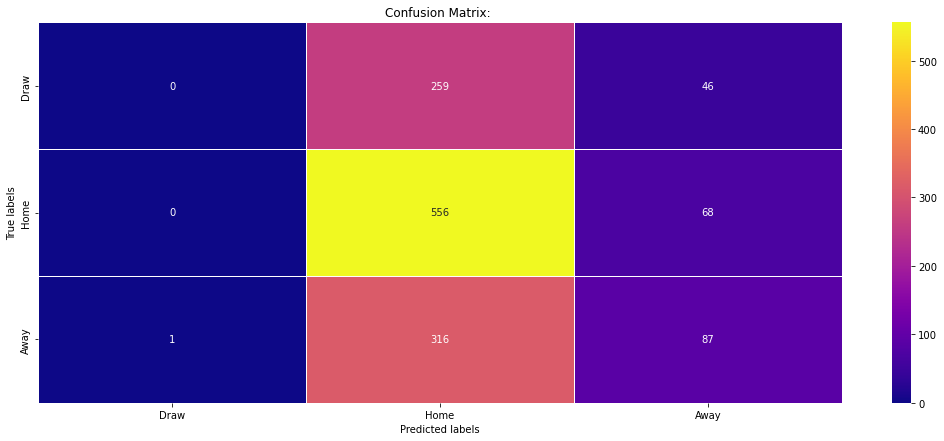

################ KNN ################
Best Train Accuracy:  0.46191164908344207
Best Model:  KNeighborsClassifier(n_neighbors=76)
Test Accuracy:  0.450112528132033


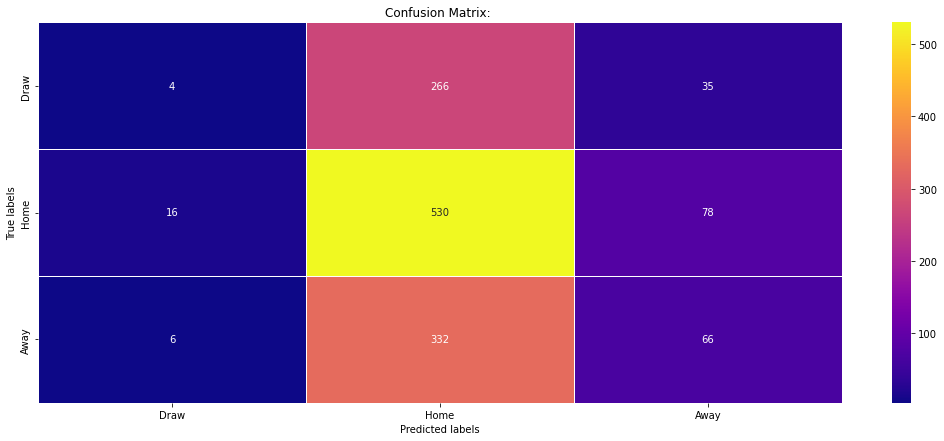

################ DECISION TREE ################
Best Train Accuracy:  0.46810492037423773
Best Model:  DecisionTreeClassifier(max_depth=2, random_state=14)
Test Accuracy:  0.4838709677419355


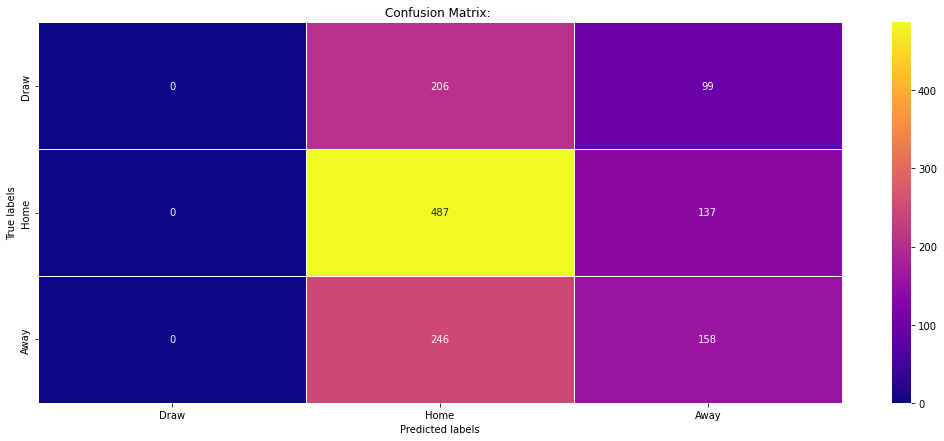

################ RANDOM FORESTS ################
Best Train Accuracy:  0.47260872087391215
Best Model:  RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=15,
                       n_estimators=500, random_state=14)
Test Accuracy:  0.4981245311327832


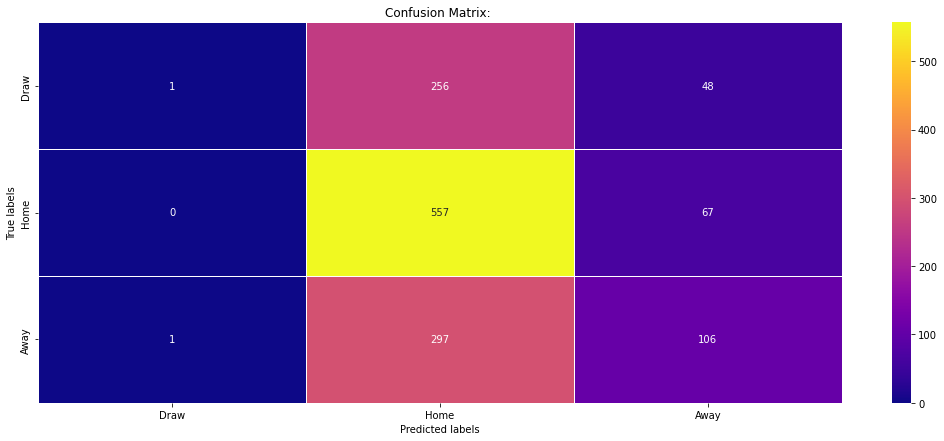

################ ADABOOST ################
Best Train Accuracy:  0.46585280892295144
Best Model:  AdaBoostClassifier(learning_rate=0.1, n_estimators=100)
Test Accuracy:  0.4711177794448612


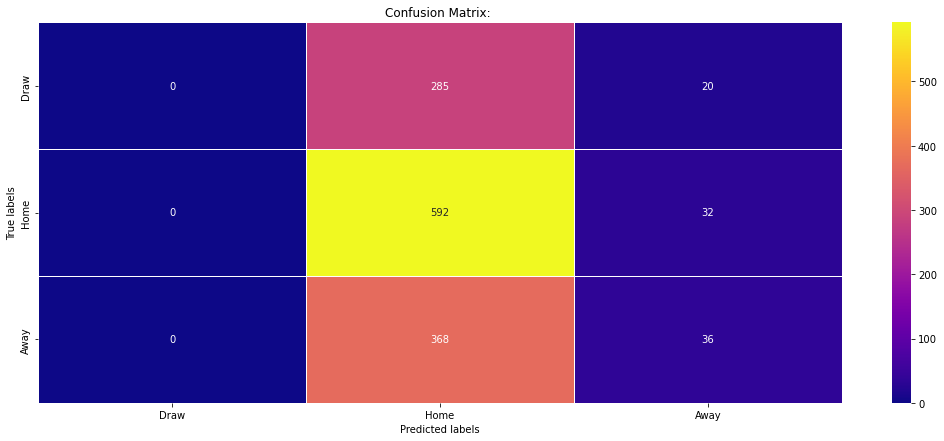

################ NAIVE BAYES ################
Best Train Accuracy:  0.4592874006789986
Best Model:  GaussianNB(var_smoothing=0.15199110829529336)
Test Accuracy:  0.46661665416354087


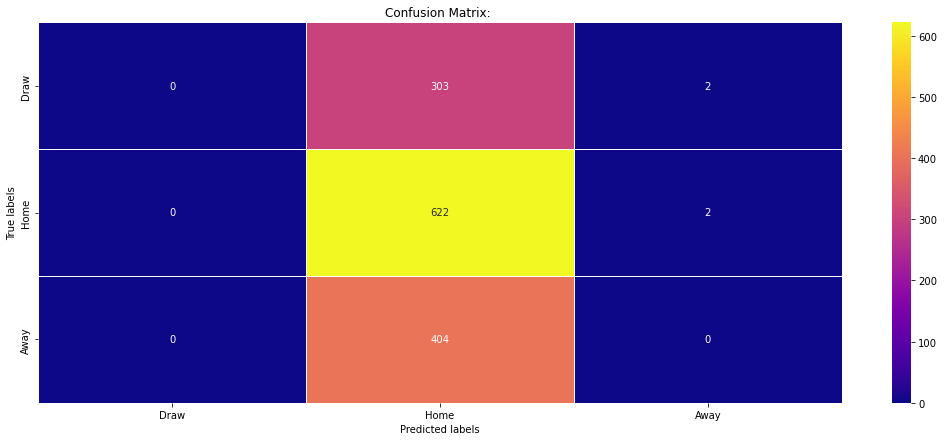

In [55]:
# Slit train and test sets
X = team_attr.loc[:, :'colors_away_color']
y = team_attr['result'] # try also with no-goal
X_train, X_test, y_train, y_test,= train_test_split(X, y, test_size=0.2, random_state=14)
# Preparing for Transformation
num_attrs = list(num_attr)
cat_attrs = list(cat_attr)
# Categorical and scaling transformation Pipeline
full_pipeline = ColumnTransformer([('num', StandardScaler(), num_attrs),('hot_attr', OrdinalEncoder(), cat_attrs)])
X_tr = full_pipeline.fit_transform(X_train)
X_te = full_pipeline.fit_transform(X_test)


for key, value in estimators_and_par.items():
    print('################', key, '################')
    grinding(estimator=value[0], grid_parameters=value[1])

### **Model 3**

################ LOGISTIC REGRESSION ################
Best Train Accuracy:  0.4671666227367653
Best Model:  LogisticRegression(C=1, max_iter=3500, multi_class='multinomial')
Test Accuracy:  0.4816204051012753


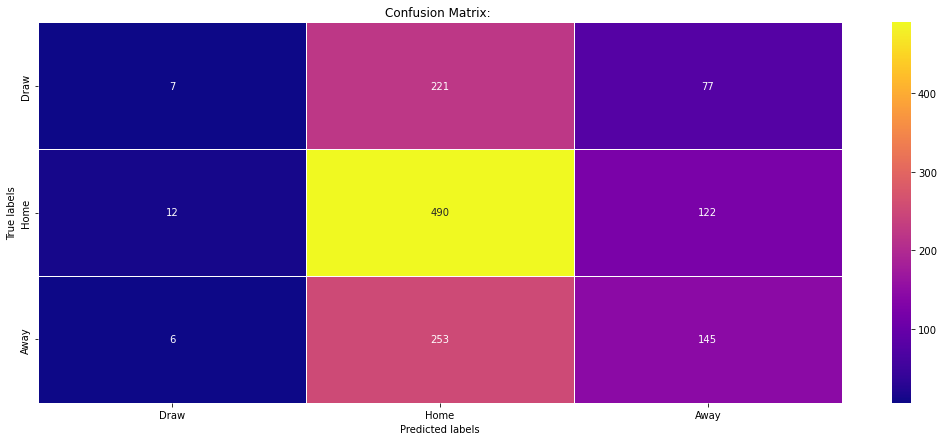

################ KNN ################
Best Train Accuracy:  0.46135013483100507
Best Model:  KNeighborsClassifier(n_neighbors=97)
Test Accuracy:  0.47336834208552137


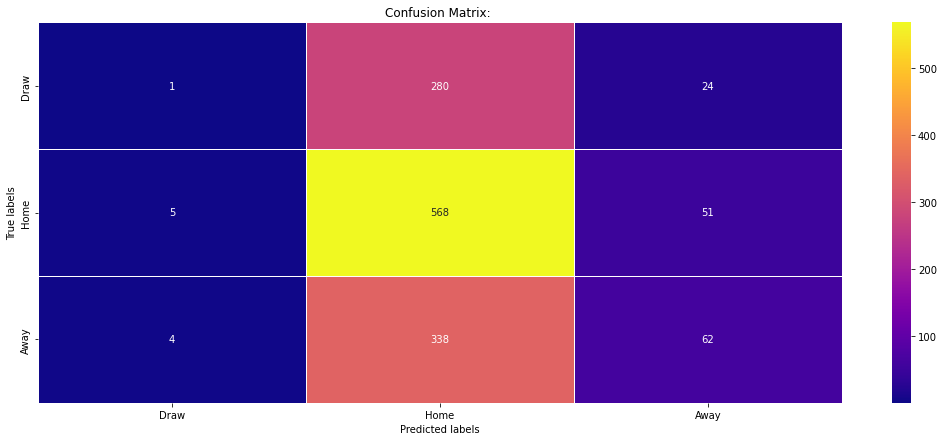

################ DECISION TREE ################
Best Train Accuracy:  0.46810492037423773
Best Model:  DecisionTreeClassifier(max_depth=2, random_state=14)
Test Accuracy:  0.48612153038259565


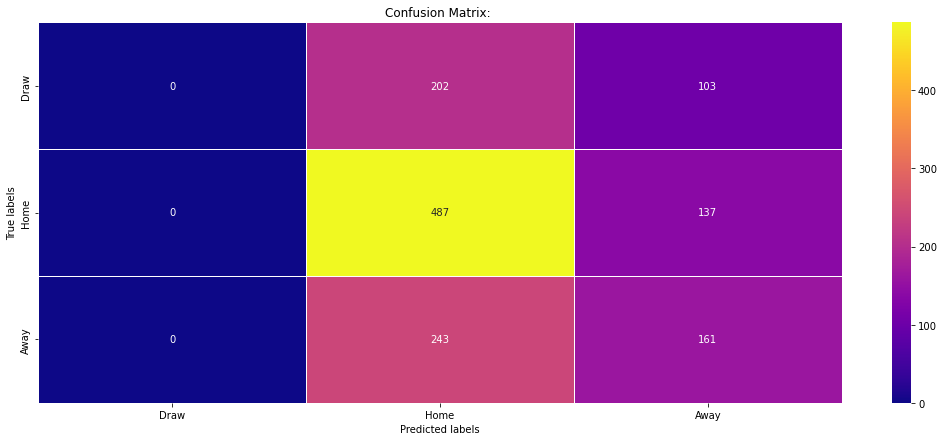

################ RANDOM FORESTS ################
Best Train Accuracy:  0.48067633462419657
Best Model:  RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=500, random_state=14)
Test Accuracy:  0.49287321830457614


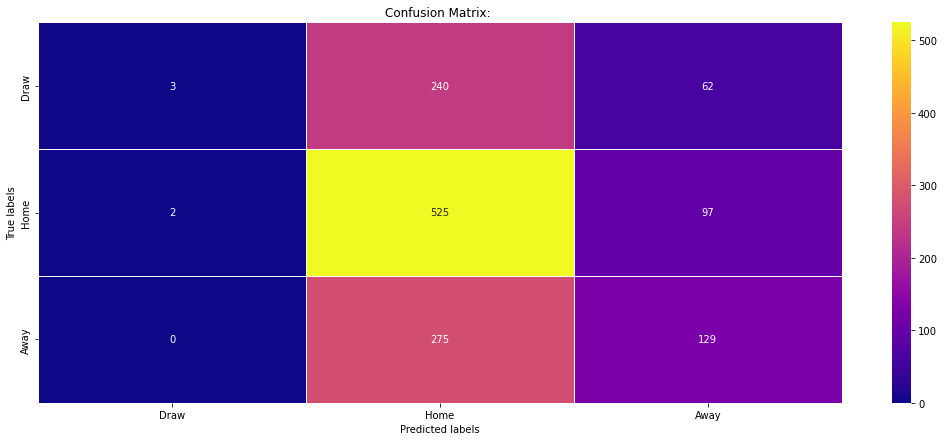

################ ADABOOST ################
Best Train Accuracy:  0.46979185674797075
Best Model:  AdaBoostClassifier(learning_rate=0.1, n_estimators=250)
Test Accuracy:  0.4831207801950488


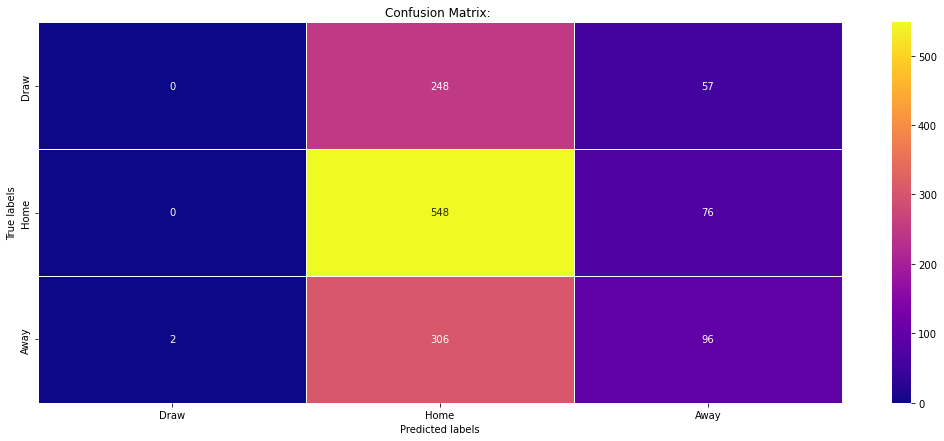

################ NAIVE BAYES ################
Best Train Accuracy:  0.4611632919491134
Best Model:  GaussianNB(var_smoothing=0.8111308307896871)
Test Accuracy:  0.4741185296324081


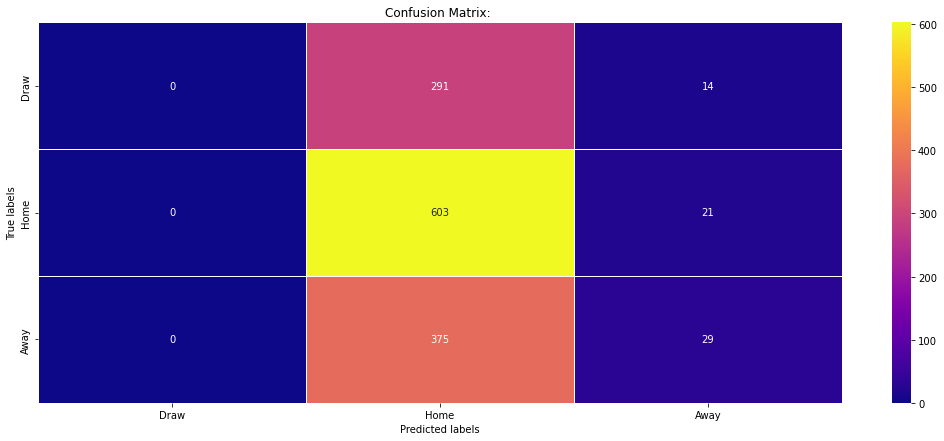

In [56]:
# Slit train and test sets
X = team_attr.loc[:, :'colors_away_color']
y = team_attr['result'] # try also with no-goal
X_train, X_test, y_train, y_test,= train_test_split(X, y, test_size=0.2, random_state=14)
# Preparing for Transformation
num_attrs = list(num_attr)
cat_attrs = list(cat_attr)
# Categorical and scaling transformation Pipeline
full_pipeline = ColumnTransformer([('num', MinMaxScaler(), num_attrs),('hot_attr', OneHotEncoder(), cat_attrs)])
X_tr = full_pipeline.fit_transform(X_train)
X_te = full_pipeline.fit_transform(X_test)


for key, value in estimators_and_par.items():
    print('################', key, '################')
    grinding(estimator=value[0], grid_parameters=value[1])

### **Model 4**

################ LOGISTIC REGRESSION ################
Best Train Accuracy:  0.47335947162466296
Best Model:  LogisticRegression(C=10, max_iter=3500, multi_class='multinomial',
                   solver='saga')
Test Accuracy:  0.4748687171792948


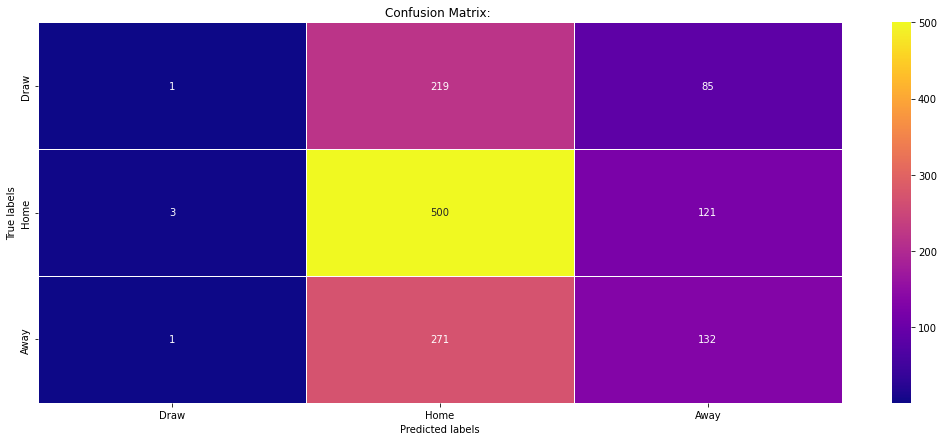

################ KNN ################
Best Train Accuracy:  0.4615378225186928
Best Model:  KNeighborsClassifier(n_neighbors=88)
Test Accuracy:  0.46811702925731435


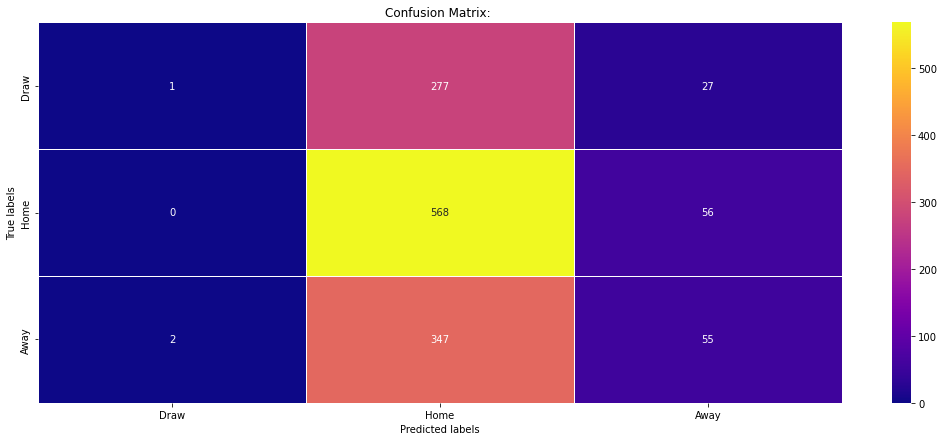

################ DECISION TREE ################
Best Train Accuracy:  0.46810492037423773
Best Model:  DecisionTreeClassifier(max_depth=2, random_state=14)
Test Accuracy:  0.48612153038259565


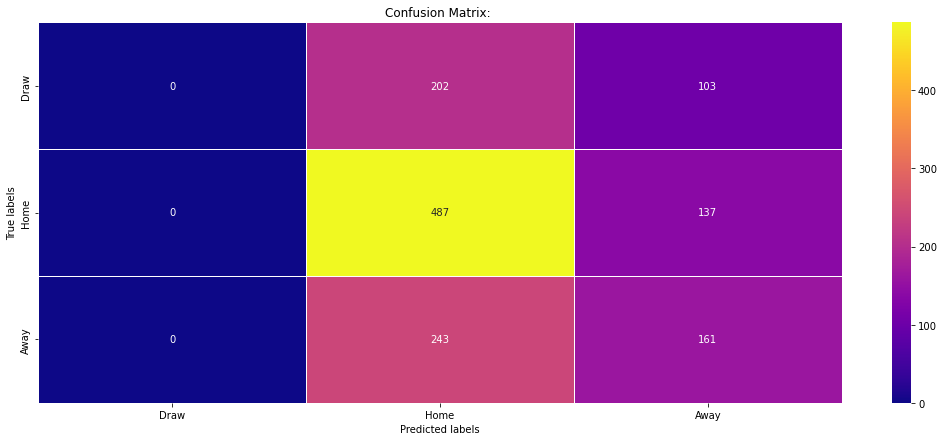

################ RANDOM FORESTS ################
Best Train Accuracy:  0.4726090024758442
Best Model:  RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=15,
                       n_estimators=500, random_state=14)
Test Accuracy:  0.4973743435858965


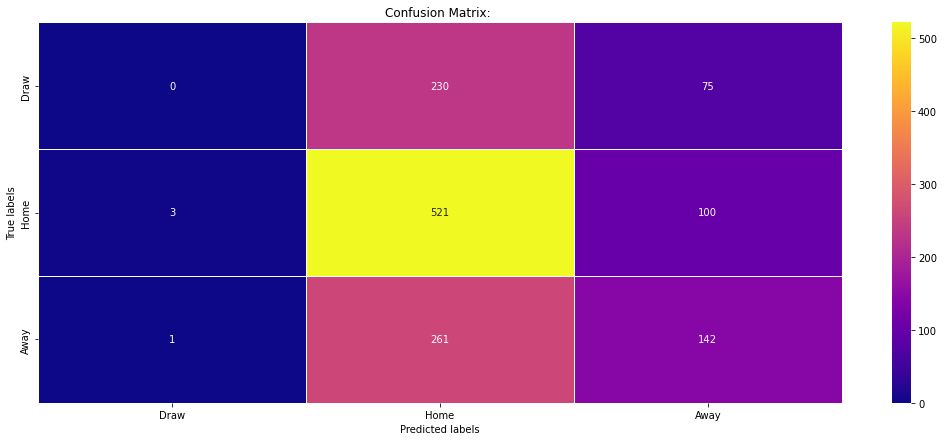

################ ADABOOST ################
Best Train Accuracy:  0.46585280892295144
Best Model:  AdaBoostClassifier(learning_rate=0.1, n_estimators=100)
Test Accuracy:  0.47261815453863465


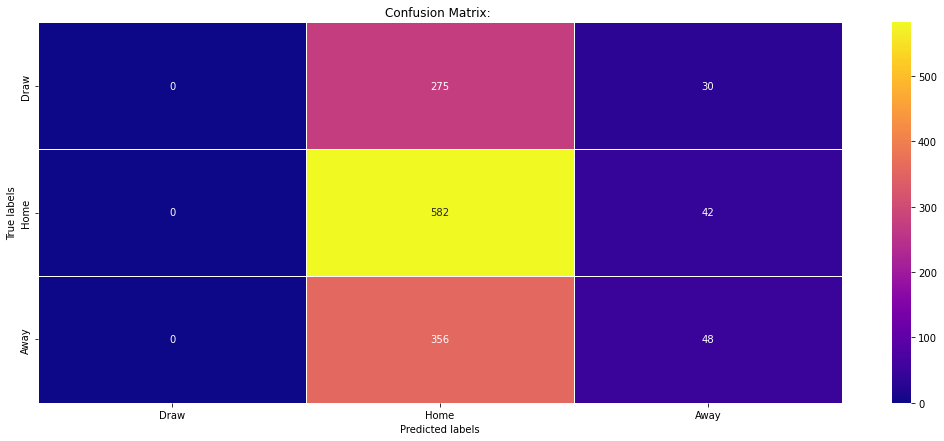

################ NAIVE BAYES ################
Best Train Accuracy:  0.4575984930917414
Best Model:  GaussianNB(var_smoothing=0.01)
Test Accuracy:  0.46811702925731435


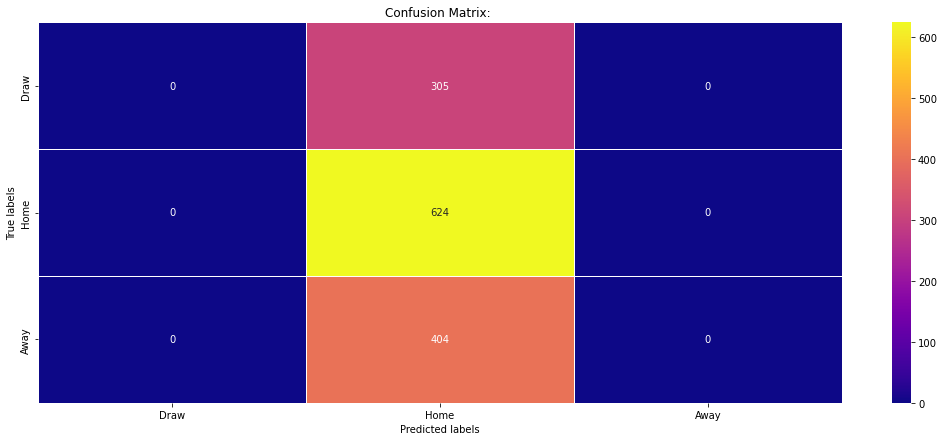

In [57]:
# Slit train and test sets
X = team_attr.loc[:, :'colors_away_color']
y = team_attr['result'] # try also with no-goal
X_train, X_test, y_train, y_test,= train_test_split(X, y, test_size=0.2, random_state=14)
# Preparing for Transformation
num_attrs = list(num_attr)
cat_attrs = list(cat_attr)
# Categorical and scaling transformation Pipeline
full_pipeline = ColumnTransformer([('num', MinMaxScaler(), num_attrs),('hot_attr', OrdinalEncoder(), cat_attrs)])
X_tr = full_pipeline.fit_transform(X_train)
X_te = full_pipeline.fit_transform(X_test)


for key, value in estimators_and_par.items():
    print('################', key, '################')
    grinding(estimator=value[0], grid_parameters=value[1])

In [58]:
# Slit train and test sets
X = team_attr.loc[:, :'colors_away_color']
y = team_attr['result'] # try also with no-goal
X_train, X_test, y_train, y_test,= train_test_split(X, y, test_size=0.2, random_state=14)
# Preparing for Transformation
num_attrs = list(num_attr)
cat_attrs = list(cat_attr)
# Categorical and scaling transformation Pipeline
full_pipeline = ColumnTransformer([('num', MinMaxScaler(), num_attrs),('hot_attr', OrdinalEncoder(), cat_attrs)])
X_tr = full_pipeline.fit_transform(X_train)
X_te = full_pipeline.fit_transform(X_test)


print('################', 'RANDOM FORESTS', '################')
grinding(estimator=estimators_and_par['RANDOM FORESTS'][0], grid_parameters=estimators_and_par['RANDOM FORESTS'][1])
print('################', 'ADABOOST', '################')
grinding(estimator=estimators_and_par['ADABOOST'][0], grid_parameters=estimators_and_par['ADABOOST'][1])

################ RANDOM FORESTS ################


KeyboardInterrupt: 

# **Features Selection Models**

### Feature Importance 

##### Decision Tree Importance

In [13]:
from sklearn.feature_selection import SelectFromModel
def select_features(X_train, y_train, X_test, n): 
    fs = SelectFromModel(DecisionTreeClassifier(random_state=14), max_features=n)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test) 
    return X_train_fs, X_test_fs, fs
    
def grinding_feat(estimator, grid_parameters, X_tr, y_tr, X_te, y_te):
    gs = GridSearchCV(estimator=estimator, param_grid=grid_parameters, cv=4, scoring='accuracy', refit=True, n_jobs=-1)
    gs.fit(X_tr,y_tr)
    # Make y_pred from the best model
    model_BEST = gs.best_estimator_
    model_BEST.fit(X_tr, y_tr)
    y_pred =model_BEST.predict(X_te)
    # Model's Accuracy 
    print('Best Train Accuracy: ', gs.best_score_, 'Test Accuracy: ', metrics.accuracy_score(y_te, y_pred))
    #Plot the Confusion Matrix
    #print(metrics.confusion_matrix(y_te, y_pred))

In [23]:
for n in range(1, X_tr.shape[1]):
    X = team_attr.loc[:, :'colors_away_color']
    y = team_attr['result'] # try also with no-goal
    X_train, X_test, y_train, y_test,= train_test_split(X, y, test_size=0.2, random_state=14)
    # Preparing for Transformation
    num_attrs = list(num_attr)
    cat_attrs = list(cat_attr)
    # Categorical and scaling transformation Pipeline
    full_pipeline = ColumnTransformer([('num', MinMaxScaler(), num_attrs),('hot_attr', OrdinalEncoder(), cat_attrs)])
    X_tr = full_pipeline.fit_transform(X_train)
    X_te = full_pipeline.fit_transform(X_test)
    X_train_fs, X_test_fs, fs = select_features(X_tr, y_train, X_te, n)
    print('*********** Number of Features: ', str(n), '***********')
    grinding_feat(estimator=RandomForestClassifier(), grid_parameters={'bootstrap': [True, False], 'max_depth': [5, 10, 20], 'min_samples_leaf': [4, 6, 10], 'min_samples_split': [7,10,15], 'n_estimators': [100, 500, 750], 'random_state':[14]}, X_tr=X_train_fs, y_tr=y_train, X_te=X_test_fs, y_te=y_test)

*********** Number of Features:  1 ***********
Best Train Accuracy:  0.443033464628149 Test Accuracy:  0.44423350735643097
*********** Number of Features:  2 ***********
Best Train Accuracy:  0.44291481251614145 Test Accuracy:  0.44423350735643097
*********** Number of Features:  3 ***********
Best Train Accuracy:  0.44291481251614145 Test Accuracy:  0.44423350735643097
*********** Number of Features:  4 ***********
Best Train Accuracy:  0.443033464628149 Test Accuracy:  0.44423350735643097
*********** Number of Features:  5 ***********
Best Train Accuracy:  0.443033464628149 Test Accuracy:  0.44423350735643097
*********** Number of Features:  6 ***********
Best Train Accuracy:  0.443033464628149 Test Accuracy:  0.44423350735643097
*********** Number of Features:  7 ***********
Best Train Accuracy:  0.44291481251614145 Test Accuracy:  0.44423350735643097
*********** Number of Features:  8 ***********
Best Train Accuracy:  0.44291481251614145 Test Accuracy:  0.44423350735643097
********

##### Random Forests Importance

In [14]:
def select_features_rf(X_train, y_train, X_test, n): 
    fs = SelectFromModel(RandomForestClassifier(n_estimators=2000, random_state=14), max_features=n)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test) 
    return X_train_fs, X_test_fs, fs

In [19]:
X = team_attr.loc[:, :'colors_away_color']
y = team_attr['result'] # try also with no-goal
X_train, X_test, y_train, y_test,= train_test_split(X, y, test_size=0.2, random_state=14)
# Preparing for Transformation
num_attrs = list(num_attr)
cat_attrs = list(cat_attr)
# Categorical and scaling transformation Pipeline
full_pipeline = ColumnTransformer([('num', MinMaxScaler(), num_attrs),('hot_attr', OrdinalEncoder(), cat_attrs)])
X_tr = full_pipeline.fit_transform(X_train)
X_te = full_pipeline.fit_transform(X_test)

for n in range(1, X_tr.shape[1]):
    X_train_fs, X_test_fs, fs = select_features_rf(X_tr, y_train, X_te, n)
    print('*********** Number of Features: ', str(n), '***********')
    grinding_feat(estimator=RandomForestClassifier(), grid_parameters={'bootstrap': [True, False], 'max_depth': [5, 10, 20], 'min_samples_leaf': [4, 6, 10], 'min_samples_split': [7,10,15], 'n_estimators': [100, 500, 750], 'random_state':[14]}, X_tr=X_train_fs, y_tr=y_train, X_te=X_test_fs, y_te=y_test)

*********** Number of Features:  1 ***********
Best Train Accuracy:  0.443033464628149 Test Accuracy:  0.44423350735643097
*********** Number of Features:  2 ***********
Best Train Accuracy:  0.443033464628149 Test Accuracy:  0.44423350735643097
*********** Number of Features:  3 ***********
Best Train Accuracy:  0.443033464628149 Test Accuracy:  0.44423350735643097
*********** Number of Features:  4 ***********
Best Train Accuracy:  0.443033464628149 Test Accuracy:  0.44423350735643097
*********** Number of Features:  5 ***********
Best Train Accuracy:  0.443033464628149 Test Accuracy:  0.44423350735643097
*********** Number of Features:  6 ***********
Best Train Accuracy:  0.443033464628149 Test Accuracy:  0.44423350735643097
*********** Number of Features:  7 ***********
Best Train Accuracy:  0.443033464628149 Test Accuracy:  0.44423350735643097
*********** Number of Features:  8 ***********
Best Train Accuracy:  0.443033464628149 Test Accuracy:  0.44423350735643097
*********** Numb

##### Permutation Importance

Feature: 0,    Score:    0.00047
Feature: 1,    Score:    0.01624
Feature: 2,    Score:    0.00024
Feature: 3,    Score:    -0.00047
Feature: 4,    Score:    0.00059
Feature: 5,    Score:    0.00152
Feature: 6,    Score:    0.00031
Feature: 7,    Score:    0.00069
Feature: 8,    Score:    -0.00055
Feature: 9,    Score:    -0.00047
Feature: 10,    Score:    -0.00009
Feature: 11,    Score:    -0.00024
Feature: 12,    Score:    -0.00233
Feature: 13,    Score:    -0.00002


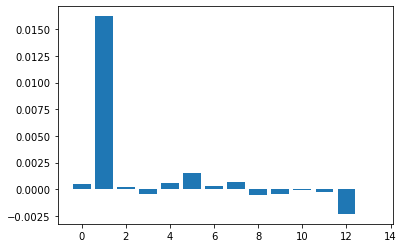

In [22]:
from sklearn.inspection import permutation_importance

model = GridSearchCV(estimator=LogisticRegression(), param_grid={'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'C':[0.001, 0.01, 0.1, 1, 5, 10, 15, 100], 'multi_class':['multinomial'], 'max_iter':[2500]}, cv=4, scoring='accuracy', refit=True, n_jobs=-1)
model.fit(X_tr, y_train)
results = permutation_importance(model, X_tr, y_train, scoring='accuracy') 
importance = results.importances_mean
for    i,v    in    enumerate(importance):
    print('Feature: %0d,    Score:    %.5f' % (i,v)) 

plt.bar([x for x in range(len(importance))],importance) 
plt.show()